In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import *
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [42]:
iris=load_iris()
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [43]:
df['target_names']=iris.target
df['target_names'].replace([0,1,2],[0,1,2],inplace = True)

In [44]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [45]:
X=df.iloc[:,0:4]
Y=df.target_names
sc=StandardScaler()
x=sc.fit_transform(X)
print(x)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(x,Y,test_size=0.2,random_state=100)
print(x.shape,Y.shape)
print(xtrain.shape,xtest.shape)
print(ytrain.shape,ytest.shape)

(150, 4) (150,)
(120, 4) (30, 4)
(120,) (30,)


In [51]:
model=LogisticRegression(penalty='l2',C=0.5)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
test_accuracy=metrics.accuracy_score(ytest,ypred)
print(test_accuracy)

0.9666666666666667


In [60]:
skf=StratifiedKFold(n_splits=5)
model=LogisticRegression(penalty='l2',C=0.9)
print(model.fit(xtrain,ytrain))

LogisticRegression(C=0.9)


In [63]:
summ_acc=0
for train_ind,test_ind in skf.split(x,Y):
    xtrain=x[train_ind]
    ytrain=Y[train_ind]
    xtest=x[test_ind]
    ytest=Y[test_ind]
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    acc=metrics.accuracy_score(ytest,ypred)
    summ_acc+=acc
print(summ_acc/5)
    

0.9533333333333334


[Text(0.5, 0.9166666666666666, 'petal width (cm) <= -0.526\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'petal width (cm) <= 0.725\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal length (cm) <= 0.678\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal width (cm) <= 0.593\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal width (cm) <= 0.462\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'petal length (cm) <= 

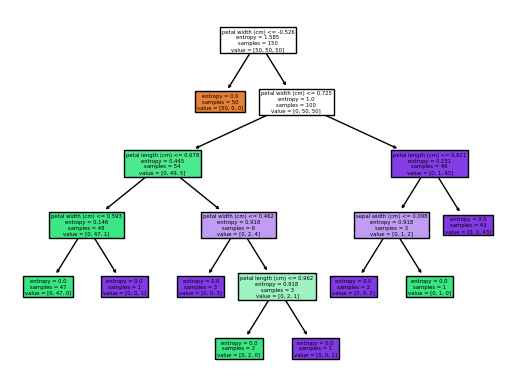

In [65]:
dtree=DecisionTreeClassifier(criterion='entropy')
dtree.fit(x,Y)
tree.plot_tree(dtree,feature_names=iris.feature_names,filled=True)